# Проект: предсказания победителя в онлайн-игре

# Подход 1: градиентный бустинг "в лоб"

In [5]:
import time
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import auc
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

%matplotlib inline

features = pd.read_csv('features.csv', index_col='match_id')
r, c = features.shape

# Удаление признаков связанных с результатами матчей и заполнение признаков с пропусками нулями
def features_clean(X):
    X = X.drop([
        'duration',
        'radiant_win',
        'tower_status_radiant',
        'tower_status_dire',
        'barracks_status_radiant',
        'barracks_status_dire'], axis=1)
    X = X.fillna(value=0)
    
    return X

# Функция тестирования модели с заданным количеством деревьев и скорости обучения
def gbc_model_test(learning_rate=0.5, n_estimators=[10, 20]):
    scores = np.array([])
    for n_est in n_estimators:
        print("n_estimators = %d" % n_est)
        cv = KFold(n_splits=5, shuffle=True, random_state=241)
        model = GradientBoostingClassifier(learning_rate=learning_rate, n_estimators=n_est, random_state=241)
        start_time = datetime.datetime.now()
        score = cross_val_score(model, X, y, cv=cv, scoring='roc_auc')
        print 'Time elapsed: ', datetime.datetime.now() - start_time
        print 'Score: ', score
        scores = np.append(scores, score.mean())
    return scores

In [6]:
X = features.copy()
y = np.ravel(features['radiant_win'])

# Определяем признаки с пропусками и заполняем их нулями
for column in X.columns:
    gap = r - X[column].count()
    if gap > 0:
        print("%s\t%d" % (column, gap))

X = features_clean(X)

first_blood_time	19553
first_blood_team	19553
first_blood_player1	19553
first_blood_player2	43987
radiant_bottle_time	15691
radiant_courier_time	692
radiant_flying_courier_time	27479
radiant_first_ward_time	1836
dire_bottle_time	16143
dire_courier_time	676
dire_flying_courier_time	26098
dire_first_ward_time	1826


In [7]:
# Подбор более подходящего значения скорости обучения
scores_ = {}
for learning_rate in [1, 0.5, 0.3, 0.2, 0.1]:
    print("\nTesting model with learning rate %f\n" % learning_rate)
    scores_[learning_rate] = gbc_model_test(learning_rate=learning_rate)

best_lr = 0
best_lr_x, best_lr_y = 0, 0
for i in xrange(5):
    if scores_.items()[i][1][0] > best_lr_x and scores_.items()[i][1][1] > best_lr_y:
        best_lr_x = scores_.items()[i][1][0]
        best_lr_y = scores_.items()[i][1][1]
        best_lr = scores_.items()[i][0]

print("\nThe best learning rate value is { %.2f }" % best_lr)


Testing model with learning rate 1.000000

n_estimators = 10
Time elapsed:  0:00:27.718006
Score:  [ 0.68995292  0.67862372  0.67873962  0.68232515  0.68697234]
n_estimators = 20
Time elapsed:  0:00:49.797470
Score:  [ 0.69669337  0.68817387  0.68508549  0.69124587  0.69476796]

Testing model with learning rate 0.500000

n_estimators = 10
Time elapsed:  0:00:26.422735
Score:  [ 0.68914913  0.67871917  0.68166658  0.68268293  0.68826445]
n_estimators = 20
Time elapsed:  0:00:48.758138
Score:  [ 0.69991575  0.69181981  0.69328443  0.69650744  0.70195446]

Testing model with learning rate 0.300000

n_estimators = 10
Time elapsed:  0:00:24.643703
Score:  [ 0.68843653  0.67603488  0.67987841  0.68262608  0.68869448]
n_estimators = 20
Time elapsed:  0:00:43.460880
Score:  [ 0.70112158  0.6903779   0.69384366  0.6930134   0.7003959 ]

Testing model with learning rate 0.200000

n_estimators = 10
Time elapsed:  0:00:23.415147
Score:  [ 0.68348338  0.66939648  0.67607657  0.67597562  0.68153762

n_estimators = 30
Time elapsed:  0:01:03.894389
Score:  [ 0.7053997   0.69699335  0.6979751   0.7018166   0.70565901]
n_estimators = 50
Time elapsed:  0:01:41.871819
Score:  [ 0.71181897  0.70167028  0.70347427  0.70618343  0.71103276]
n_estimators = 100
Time elapsed:  0:03:15.643749
Score:  [ 0.71541638  0.70792045  0.70617748  0.71129033  0.71575365]
n_estimators = 200
Time elapsed:  0:06:07.400567
Score:  [ 0.71566823  0.71002401  0.7107601   0.71069774  0.71714431]
n_estimators = 250
Time elapsed:  0:07:58.384245
Score:  [ 0.71371971  0.70903301  0.70892526  0.71173471  0.71594359]
n_estimators = 300
Time elapsed:  0:08:53.675417
Score:  [ 0.71116831  0.70796453  0.70738595  0.7106641   0.71432084]
n_estimators = 350
Time elapsed:  0:10:34.339841
Score:  [ 0.71091993  0.70697359  0.70577619  0.71055353  0.71397314]


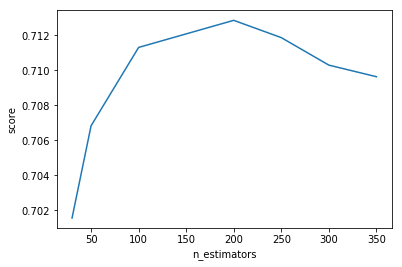

In [9]:
# Подбираем оптимальное число деревьев
scores = gbc_model_test(n_estimators=[30, 50, 100, 200, 250, 300, 350])

plt.plot([30, 50, 100, 200, 250, 300, 350], scores)
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.show()

# Ответы на часть 1
<br>
1. Какие признаки имеют пропуски среди своих значений? Что могут означать пропуски в этих признаках (ответьте на этот вопрос для двух любых признаков)?<br>
Следующие признаки **имеют пропуски** среди своих значений (Признак : количество пропусков):<br>
first_blood_time : 19553<br>
first_blood_team : 19553<br>
first_blood_player1 : 19553<br>
first_blood_player2 : 43987<br>
radiant_bottle_time : 15691<br>
radiant_courier_time : 692<br>
radiant_flying_courier_time : 27479<br>
radiant_first_ward_time : 1836<br>
dire_bottle_time : 16143<br>
dire_courier_time : 676<br>
dire_flying_courier_time : 26098<br>
dire_first_ward_time : 1826<br>
<br>
Признак **first\_blood\_time** - это игровое время первой крови. "Первая кровь", как событие, может не произойти в первые пять минут игры, тогда оно примет пропущенное значение. Этим могут объясняться пропуски в остальных признаках "первой крови".<br>
Признак **first\_blood\_player2** - это второй игрок, причастный к событию "первой крови". Данное событие может происходить с участием только одного игрока, тогда значение причастности второго будет пропуском.<br>
Признаки **(radiant|dire)\_bottle\_time** - время первого приобретения командой предмета "bottle". Команды могут не купить за первые 5 минут данный предмет, тогда значение будет пропуском.<br>
<br>
2. Как называется столбец, содержащий целевую переменную?<br>
**radiant_win**<br>
<br>
3. Как долго проводилась кросс-валидация для градиентного бустинга с 30 деревьями? Какое качество при этом получилось? <br>
Кросс-валидация для градиентного бустинга с **30 деревьями** проводилась **0:01:09**, с качеством **AUC-ROC 0.70**.<br>
<br>
4. Имеет ли смысл использовать больше 30 деревьев в градиентном бустинге? Что бы вы предложили делать, чтобы ускорить его обучение при увеличении количества деревьев?<br>
Да, имеет смысл использовать более 30 деревьев, примерно около 200, т.к. качество при большем количестве деревьев растет. При количестве деревьев более 200 качество начинает падать.<br>
50 деревьев - качество 0.70683594<br>
100 деревьев - качество 0.71131166<br>
**200 деревьев - качество 0.71285888**<br>
250 деревьев - качество 0.71187126<br>
300 деревьев - качество 0.71030075<br>
350 деревьев - качество 0.70963928<br>
<br>
Для усорения обучения можно сократить глубину строящихся деревьев (max_depth), также можно обучаться не на всей выборке, а использовать только часть от неё.

# Подход 2: логистическая регрессия

In [12]:
features_train = pd.read_csv('features.csv', index_col='match_id')
r, c = features_train.shape

C_row = range(-5, 5)
C = [10 ** i for i in C_row]

# Масштабируем данные
def features_scaler(X):
    scaler = StandardScaler()
    X_scale = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns)

    return X_scale

# Удаляем категориальные признаки
def features_clean_categories(X):
    X_without_categories = X.copy()
    X_without_categories = X.drop([
        'lobby_type',
        'r1_hero', 'r2_hero', 'r3_hero', 'r4_hero', 'r5_hero',
        'd1_hero', 'd2_hero', 'd3_hero', 'd4_hero', 'd5_hero'
    ], axis=1)
    
    return X_without_categories

# Создание новых признаков на основе "мешка слов"
def features_create(X, heroes_count):
    X_pick = np.zeros((X.shape[0], heroes_count))

    for i, match_id in enumerate(X.index):
        for p in xrange(5):
            X_pick[i, X.ix[match_id, 'r%d_hero' % (p+1)]-1] = 1
            X_pick[i, X.ix[match_id, 'd%d_hero' % (p+1)]-1] = -1
    
    heroes_columns = ['h' + str(i) for i in xrange(1, heroes_count+1)]
    X_pick = pd.DataFrame(X_pick, index=X.index, columns=heroes_columns)

    return X_pick

# Функция тестирования модели с заданным параметром C
def model_test(X, y, C = [0.1]):
    scores = np.array([])
    for c in C:
        print("C = %f" % c)
        cv = KFold(n_splits=5, shuffle=True, random_state=241)
        model = LogisticRegression(C=c)
#        model = LogisticRegression(penalty='l2', solver='saga', C=c)
        start_time = datetime.datetime.now()
        score = cross_val_score(model, X, y, cv=cv, scoring='roc_auc')
        print 'Time elapsed: ', datetime.datetime.now() - start_time
        print 'Score: ', score
        scores = np.append(scores, score.mean())
    return scores

def get_best_c(scores, C):
    evaluation = 0
    c = 0
    for i in xrange(len(scores)):
        if evaluation < scores[i]:
            c = i
            evaluation = scores[i]
    
    return evaluation, C[c]

def get_plot_C(C_row, scores):
    plt.plot(C_row, scores)
    plt.xlabel('log(C)')
    plt.ylabel('score')
    plt.show()


C = 0.000010
Time elapsed:  0:00:02.437932
Score:  [ 0.69959206  0.69159358  0.69419291  0.69433159  0.69589176]
C = 0.000100
Time elapsed:  0:00:03.892898
Score:  [ 0.7161759   0.7083769   0.70960313  0.71017245  0.71192219]
C = 0.001000
Time elapsed:  0:00:07.518453
Score:  [ 0.72134945  0.71368677  0.71425051  0.71512064  0.71649386]
C = 0.010000
Time elapsed:  0:00:09.928469
Score:  [ 0.7216634   0.71377395  0.71440813  0.71540233  0.7164595 ]
C = 0.100000
Time elapsed:  0:00:10.984627
Score:  [ 0.72165841  0.7137031   0.71438941  0.71539496  0.71640454]
C = 1.000000
Time elapsed:  0:00:10.382567
Score:  [ 0.72165762  0.71369565  0.71438656  0.71539329  0.7163998 ]
C = 10.000000
Time elapsed:  0:00:10.390042
Score:  [ 0.72165702  0.7136947   0.71438623  0.71539423  0.71639952]
C = 100.000000
Time elapsed:  0:00:10.390577
Score:  [ 0.72165734  0.71369455  0.7143859   0.71539408  0.71639946]
C = 1000.000000
Time elapsed:  0:00:10.387783
Score:  [ 0.72165734  0.71369457  0.71438593  0

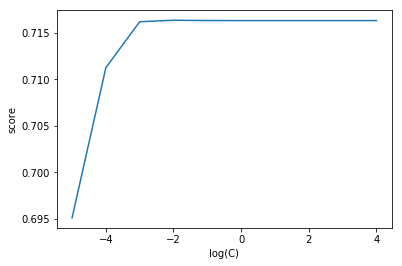

The best score is 0.716341 with C = 0.010000


In [13]:
# First - Тестирование на исходных данных

X = features_train.copy()
y = np.ravel(X['radiant_win'])
X = features_clean(X)
X = features_scaler(X)

scores_first = model_test(X, y, C)
evaluation_first, c_first = get_best_c(scores_first, C)
get_plot_C(C_row, scores_first)
print("The best score is %f with C = %f" % (evaluation_first, c_first))

На исходных данных наилучшее качество получилось 0.716341 при С = 0.01.
Этот результат почти такой же, как и у градиентного бустинга с 200 деревьями.
Логистическая регрессия по сравнению с градиентным бустингом работает значительно быстрее.

C = 0.000010
Time elapsed:  0:00:02.208137
Score:  [ 0.69961316  0.69150564  0.69419646  0.69425458  0.69571482]
C = 0.000100
Time elapsed:  0:00:03.508269
Score:  [ 0.71630684  0.70828717  0.70971489  0.71020968  0.71172337]
C = 0.001000
Time elapsed:  0:00:06.715190
Score:  [ 0.72152794  0.71360976  0.71445497  0.71521698  0.71636831]
C = 0.010000
Time elapsed:  0:00:08.846798
Score:  [ 0.7218164   0.71370124  0.71462628  0.71551614  0.71634469]
C = 0.100000
Time elapsed:  0:00:09.249624
Score:  [ 0.72181205  0.7136378   0.7146095   0.71551012  0.71629945]
C = 1.000000
Time elapsed:  0:00:10.122859
Score:  [ 0.72181039  0.71363045  0.71460884  0.71551016  0.71629392]
C = 10.000000
Time elapsed:  0:00:10.096375
Score:  [ 0.72181043  0.71362965  0.71460893  0.71551033  0.71629306]
C = 100.000000
Time elapsed:  0:00:09.860056
Score:  [ 0.72181067  0.71362945  0.71460889  0.71551027  0.71629322]
C = 1000.000000
Time elapsed:  0:00:09.260015
Score:  [ 0.72181072  0.71362952  0.71460893  0

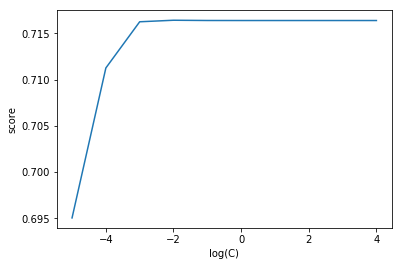

The best score is 0.716401 with C = 0.010000


In [14]:
# SECOND - Тестирование на данных без категориальных признаков

X_ = features_clean_categories(X)

scores_second = model_test(X_, y, C)
evaluation_second, c_second = get_best_c(scores_second, C)
get_plot_C(C_row, scores_second)
print("The best score is %f with C = %f" % (evaluation_second, c_second))

Качество при использовании данных без категориальных признаков не изменилось (0.716401) при том же значении С = 0.01.
Таким образом эти признаки не влияют на предсказание модели.

In [15]:
# Подсчет количества различных идентификаторов героев

hero_columns = ['r1_hero', 'r2_hero', 'r3_hero', 'r4_hero', 'r5_hero', 'd1_hero', 'd2_hero', 'd3_hero', 'd4_hero', 'd5_hero']
hero_values = np.array([])

for column in hero_columns:
    t = features[column].unique()
    hero_values = np.append(hero_values, t)

heroes_count_train = len(np.unique(hero_values))
print("There are %d heroes used at train data." % heroes_count_train)

heroes = pd.read_csv('heroes.csv')
heroes_count = len(heroes)
print("There are %d heroes used at the game (data from heroes.csv)" % heroes_count)

There are 108 heroes used at train data.
There are 112 heroes used at the game (data from heroes.csv)


/usr/lib/python2.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


C = 0.000010
Time elapsed:  0:00:03.061918
Score:  [ 0.70384072  0.69557033  0.69838234  0.69839816  0.69966507]
C = 0.000100
Time elapsed:  0:00:04.522909
Score:  [ 0.7300782   0.7222305   0.72367081  0.72384682  0.72528442]
C = 0.001000
Time elapsed:  0:00:08.872006
Score:  [ 0.75073228  0.74413908  0.74560954  0.74433549  0.74666478]
C = 0.010000
Time elapsed:  0:00:14.430766
Score:  [ 0.75511581  0.7496667   0.7517913   0.74944059  0.75266536]
C = 0.100000
Time elapsed:  0:00:19.354557
Score:  [ 0.7551572   0.74990841  0.75213544  0.74956231  0.75292389]
C = 1.000000
Time elapsed:  0:00:20.321413
Score:  [ 0.75512742  0.74989818  0.75212697  0.74954165  0.75290449]
C = 10.000000
Time elapsed:  0:00:20.467095
Score:  [ 0.75512089  0.74989744  0.75212535  0.74954013  0.75290264]
C = 100.000000
Time elapsed:  0:00:20.416685
Score:  [ 0.75512029  0.74989741  0.75212493  0.74954004  0.75290224]
C = 1000.000000
Time elapsed:  0:00:20.790403
Score:  [ 0.75512035  0.74989711  0.75212518  0

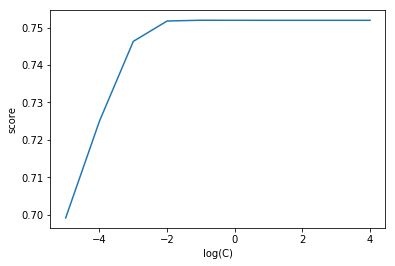

The best score is 0.751937 with C = 0.100000


In [17]:
# ThIRD - Тестирование с добавлением новых признаков героев

X_pick = features_create(features_train, heroes_count=heroes_count)
X_bag = pd.concat([X_, X_pick], axis=1)

scores_bag = model_test(X_bag, y, C)
evaluation_bag, c_bag = get_best_c(scores_bag, C)
get_plot_C(C_row, scores_bag)
print("The best score is %f with C = %f" % (evaluation_bag, c_bag))

При использовании "мешка слов" качество получилось 0.751937 при параметре C = 0.1.
Качество улучшилось. Это можно объяснить тем, что раньше по имеющимся признаком нельзя было учесть индивидуально каждого героя, соответственно и его возможность выигрывать.

In [18]:
# Запуск модели на тестовой выборке

features_test = pd.read_csv('features_test.csv', index_col='match_id')
X_test = features_test.copy()
X_test = X_test.fillna(0)
X_test = features_scaler(X_test)
X_test = features_clean_categories(X_test)
X_pick1 = features_create(features_test, heroes_count=heroes_count)
X_test = pd.concat([X_test, X_pick1], axis=1)

model = LogisticRegression(C=0.1, random_state=241, n_jobs=-1)
model.fit(X_bag, y)

pred = model.predict_proba(X_test)[:, 1]

submission = pd.DataFrame({
    'match_id':list(X_test.index),
    'radiant_win':list(pred)
})

submission.to_csv('dota2_predicts_logreg.csv', index=False)

print("Max prediction value of test data is %f" % pred.max())
print("Min prediction value of test data is %f" % pred.min())

/usr/lib/python2.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/usr/lib64/python2.7/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


Max prediction value of test data is 0.996459
Min prediction value of test data is 0.008581


Предсказанные вероятности адекватные. Полученная модель получила на Kaggle оценку **0.75526**

# Ответы на часть 2
<br>
1. Какое качество получилось у логистической регрессии над всеми исходными признаками? Как оно соотносится с качеством градиентного бустинга? Чем вы можете объяснить эту разницу? Быстрее ли работает логистическая регрессия по сравнению с градиентным бустингом?<br>
<br>
На сырых данных наилучшее качество получилось **0.716341** при **С = 0.01**.<br>
Этот результат почти такой же, как и у градиентного бустинга с 200 деревьями.<br>
Логистическая регрессия по сравнению с градиентным бустингом работает значительно быстрее.<br>
<br>
2. Как влияет на качество логистической регрессии удаление категориальных признаков (укажите новое значение метрики качества)? Чем вы можете объяснить это изменение?<br>
<br>
Качество при использовании данных без категориальных признаков не изменилось (**0.716401**) при том же значении **С = 0.01**.
Таким образом эти признаки не влияют на предсказание модели.
<br>
3. Сколько различных идентификаторов героев существует в данной игре?<br>
<br>
Если получать индентификаторы из тренировочных двнных, то всего их насчитывается 108. Всего же в игре существут **112** различных идентификаторов (из данных heroes.csv)<br>
<br>
4. Какое получилось качество при добавлении "мешка слов" по героям? Улучшилось ли оно по сравнению с предыдущим вариантом? Чем вы можете это объяснить?<br>
<br>
При использовании "мешка слов" качество получилось **0.751937** при параметре **C = 0.1**.<br>
Качество улучшилось. Это можно объяснить тем, что раньше по имеющимся признаком нельзя было учесть индивидуально каждого героя, соответственно и его возможность выигрывать.<br>
<br>
5. Какое минимальное и максимальное значение прогноза на тестовой выборке получилось у лучшего из алгоритмов?<br>
Минимальное и максимальное значение прогноза на тестовой выборке получилось **0.008581** и **0.996459** соответственно.
